In [1]:
from classify import data_pipeline, eco_selector
from resources.get_data import get_current_data
from resources.setup import get_setup
import pandas as pd

In [5]:
def validator(df):
    df = df.drop_duplicates()
    df = df[~df['text'].isna()]
    if 'vectorized' in df.columns.values:
        df = df.drop(columns=['vectorized'])
    if df.index.duplicated().any():
        print("Duplicated index!!!")
        df = df.reset_index()
        df = df.drop(columns = ['id'])
        df = df.rename(columns = {'index': 'id'})
    elif 'id' not in df.columns.values:
        df = df.reset_index()
        df = df.rename(columns = {'index': 'id'})
    df['date'] = pd.to_datetime(df['date'])
    print(f"Found {len(df)} files")
    return df

# Big corpuses

## Rzepa

In [3]:
corp = 'rzepa'
df_rest, df_eco = data_pipeline(corp)
df_final = pd.concat([df_eco, eco_selector(df_rest)])
df_final = validator(df_final)
df_final.to_csv(f"eco_{corp}.csv")

{1: 'rzepa', 2: 'gpc', 3: 'newsweek', 4: 'wprost', 5: 'dorzeczy', 6: 'polityka', 7: 'wyborcza', 8: 'wpolityce'}
rzepa
Configuration finished
Dataset of 8648 samples
label
1    5955
0    2693
Name: count, dtype: int64
Preprocessing ended
Accuracy of model 0.9965317919075144


100%|██████████| 58/58 [01:56<00:00,  2.01s/it]


28861 852
Found 6807 files


## Wyborcza

In [6]:
corp = 'wyborcza'
df_rest, df_eco = data_pipeline(corp)
df_final = pd.concat([df_eco, eco_selector(df_rest)])
df_final = validator(df_final)
df_final.to_csv(f"eco_{corp}.csv")

{1: 'rzepa', 2: 'gpc', 3: 'newsweek', 4: 'wprost', 5: 'dorzeczy', 6: 'polityka', 7: 'wyborcza', 8: 'wpolityce'}
wyborcza
Configuration finished
Dataset of 17765 samples
label
0    10375
1     7390
Name: count, dtype: int64
Preprocessing ended
Accuracy of model 0.9966235227912211


100%|██████████| 96/96 [03:35<00:00,  2.25s/it]


47627 1760
Duplicated index!!!
Found 7151 files


In [7]:
df_final = validator(df_final)
df_final.to_csv(f"eco_{corp}.csv")

Found 7151 files


## Gazeta Polska Codziennie

In [8]:
corp = 'gpc'
df_rest, df_eco = data_pipeline(corp)
df_eco = pd.concat([df_eco, eco_selector(df_rest, False)])
df_eco = validator(df_eco)
df_eco.to_csv(f"eco_{corp}.csv")

{1: 'rzepa', 2: 'gpc', 3: 'newsweek', 4: 'wprost', 5: 'dorzeczy', 6: 'polityka', 7: 'wyborcza', 8: 'wpolityce'}
gpc
Configuration finished


Dataset of 8166 samples
label
1    4129
0    4037
Name: count, dtype: int64
Preprocessing ended
Accuracy of model 0.99265605875153


100%|██████████| 24/24 [00:39<00:00,  1.64s/it]


11504 1151
Duplicated index!!!
Found 3280 files


## Polityka

In [9]:
corp = 'polityka'
df_rest, df_eco = data_pipeline(corp)
df_eco = pd.concat([df_eco, eco_selector(df_rest)])
df_eco = validator(df_eco)
df_eco.to_csv(f"eco_{corp}.csv")

{1: 'rzepa', 2: 'gpc', 3: 'newsweek', 4: 'wprost', 5: 'dorzeczy', 6: 'polityka', 7: 'wyborcza', 8: 'wpolityce'}
polityka
Configuration finished
Dataset of 5683 samples
label
0    3149
1    2534
Name: count, dtype: int64
Preprocessing ended
Accuracy of model 0.9894551845342706


100%|██████████| 4/4 [00:22<00:00,  5.54s/it]


1909 149
Found 683 files


# Small Corpuses

## Dorzeczy

In [10]:
from datetime import datetime

corp = 'dorzeczy'
df_rest, df_eco = data_pipeline(corp)
df_eco = pd.concat([df_eco, eco_selector(df_rest)])
df_eco = df_eco.reset_index().drop(columns='id').rename(columns={'Unnamed: 0': 'id'}).set_index('id')
df_eco = df_eco[df_eco['date'] < datetime(2023, 1, 1)]
df_eco = validator(df_eco)
df_eco.to_csv(f"eco_{corp}.csv")

{1: 'rzepa', 2: 'gpc', 3: 'newsweek', 4: 'wprost', 5: 'dorzeczy', 6: 'polityka', 7: 'wyborcza', 8: 'wpolityce'}
dorzeczy
Configuration finished
Dataset of 5176 samples
label
0    2942
1    2234
Name: count, dtype: int64
Preprocessing ended
Accuracy of model 0.9903474903474904


100%|██████████| 2/2 [00:11<00:00,  5.76s/it]


696 49
Found 220 files


## Wprost

In [11]:
corp = 'wprost'
df_rest, df_eco = data_pipeline(corp)
df_eco = pd.concat([df_eco, eco_selector(df_rest)])
df_eco = validator(df_eco)
df_eco.to_csv(f"eco_{corp}.csv")

{1: 'rzepa', 2: 'gpc', 3: 'newsweek', 4: 'wprost', 5: 'dorzeczy', 6: 'polityka', 7: 'wyborcza', 8: 'wpolityce'}
wprost
Configuration finished


Dataset of 5240 samples
label
0    2873
1    2367
Name: count, dtype: int64
Preprocessing ended
Accuracy of model 0.9885496183206107


100%|██████████| 2/2 [00:05<00:00,  2.98s/it]


763 30
Found 400 files


## Newsweek

In [12]:
corp = 'newsweek'
df_rest, df_eco = data_pipeline(corp)
df_eco = pd.concat([df_eco, eco_selector(df_rest)])
df_eco = validator(df_eco)
df_eco.to_csv(f"eco_{corp}.csv")

{1: 'rzepa', 2: 'gpc', 3: 'newsweek', 4: 'wprost', 5: 'dorzeczy', 6: 'polityka', 7: 'wyborcza', 8: 'wpolityce'}
newsweek
Configuration finished


/home/ps/Code/Climate/Classification/resources/get_data.py:7: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_eco = pd.read_csv(drive_path / corpus / "eco_result.csv", index_col=['id', 'source'], parse_dates=['date'])
/home/ps/Code/Climate/Classification/resources/get_data.py:9: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_rest = pd.read_csv(drive_path / corpus / "results.csv", index_col = ['id', 'source'], parse_dates=['date'])


Dataset of 5246 samples
label
0    2959
1    2287
Name: count, dtype: int64
Preprocessing ended
Accuracy of model 0.9904761904761905


100%|██████████| 3/3 [00:16<00:00,  5.36s/it]


1164 69
Found 356 files


## wPolityce

In [13]:
corp = 'wpolityce'
df_rest, df_eco = data_pipeline(corp)
df_eco = pd.concat([df_eco, eco_selector(df_rest)])
df_eco = validator(df_eco)
df_eco.to_csv(f"eco_{corp}.csv")

{1: 'rzepa', 2: 'gpc', 3: 'newsweek', 4: 'wprost', 5: 'dorzeczy', 6: 'polityka', 7: 'wyborcza', 8: 'wpolityce'}
wpolityce
Configuration finished


Dataset of 5321 samples
label
0    2985
1    2336
Name: count, dtype: int64
Preprocessing ended
Accuracy of model 0.9924953095684803


100%|██████████| 3/3 [00:24<00:00,  8.24s/it]


1345 67
Found 404 files


# Corpus

In [14]:
import os
corps = [file for file in os.listdir() if file.startswith("eco")]
print(corps)

['eco_rzepa.csv', 'eco_gpc.csv', 'eco_dorzeczy.csv', 'eco_wyborcza.csv', 'eco_newsweek.csv', 'eco_wprost.csv', 'eco_wpolityce.csv', 'eco_polityka.csv']


## Dates

## Most Common ngrams

In [17]:
df = pd.concat(data)
len(df)

19301

In [6]:
from files.ngram.ngrams import ngram_counter
df = df[~df['clean_text'].isna()]
for ngram in range(1, 4):
    df_ngram = ngram_counter(ngram, df).iloc[:100]
    df_ngram.to_csv(f"most_common_{ngram}-gram.csv", index=False)

A: -2652.7601162624105, B: 0.10696526858131279, C: 4420.447518212004


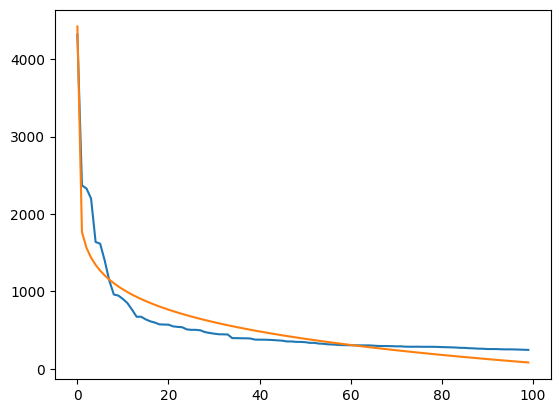

In [12]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
x = df_ngram.index
y = df_ngram[1]
# Define the function to fit
def func(x, A, B, C):
    return A * np.power(x, B) + C

# Fit the data
params, _ = curve_fit(func, x, y)

# Extract the fitted parameters
A, B, C = params

# Print the fitted parameters
print(f"A: {A}, B: {B}, C: {C}")
y = df_ngram[1] 
plt.plot(df_ngram[1])
plt.plot(func(x, A, B, C))

## Selected ngrams distribution

In [5]:
import regex as re
import matplotlib.pyplot as plt

In [24]:
data = []
for corp in corps:
    df = pd.read_csv(corp, usecols=['clean_text','date', 'source'], parse_dates=['date'])
    data.append(df)
    
data = pd.concat(data)

In [33]:
data['climate_change_count'] = data['clean_text'].str.count(r"zmiana klimat", flags=re.IGNORECASE)
data['global_warming_count'] = data['clean_text'].str.count(r"globalny ocieplenie", flags=re.IGNORECASE)


Text(0.5, 58.7222222222222, 'Year')

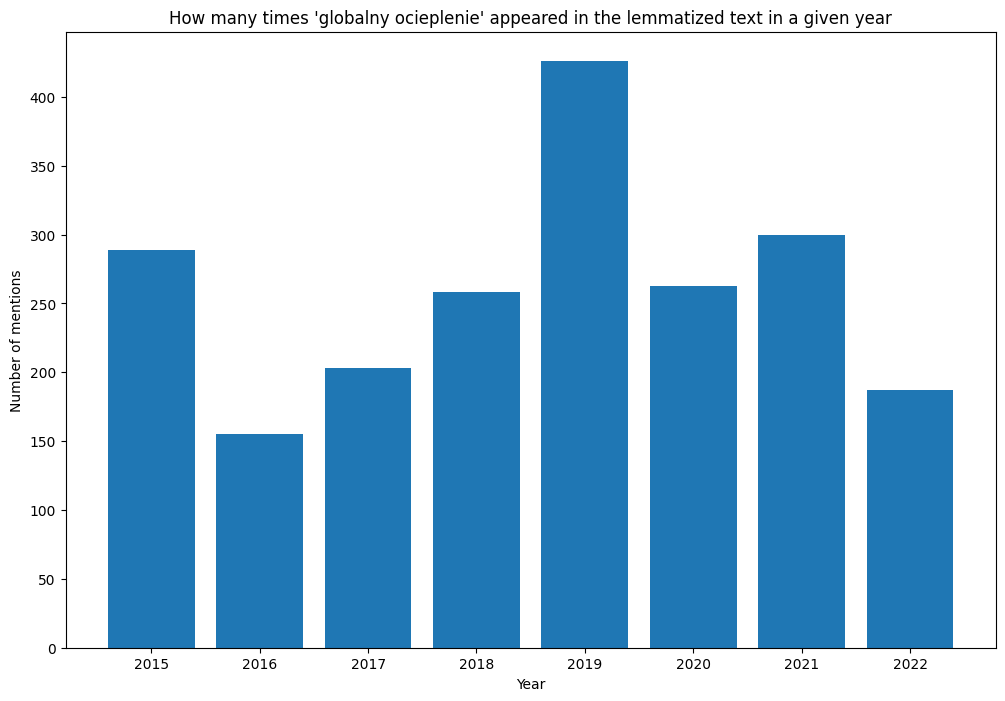

In [26]:
global_warming_count = data.groupby(data.date.dt.year).global_warming_count.sum()
plt.figure(figsize=(12, 8))
plt.bar(global_warming_count.index, global_warming_count)
plt.xlabel("Year")
plt.ylabel("Number of mentions")
plt.title("How many times 'globalny ocieplenie' appeared in the lemmatized text in a given year")
plt.savefig("global_warming.png")
plt.xlabel("Year")

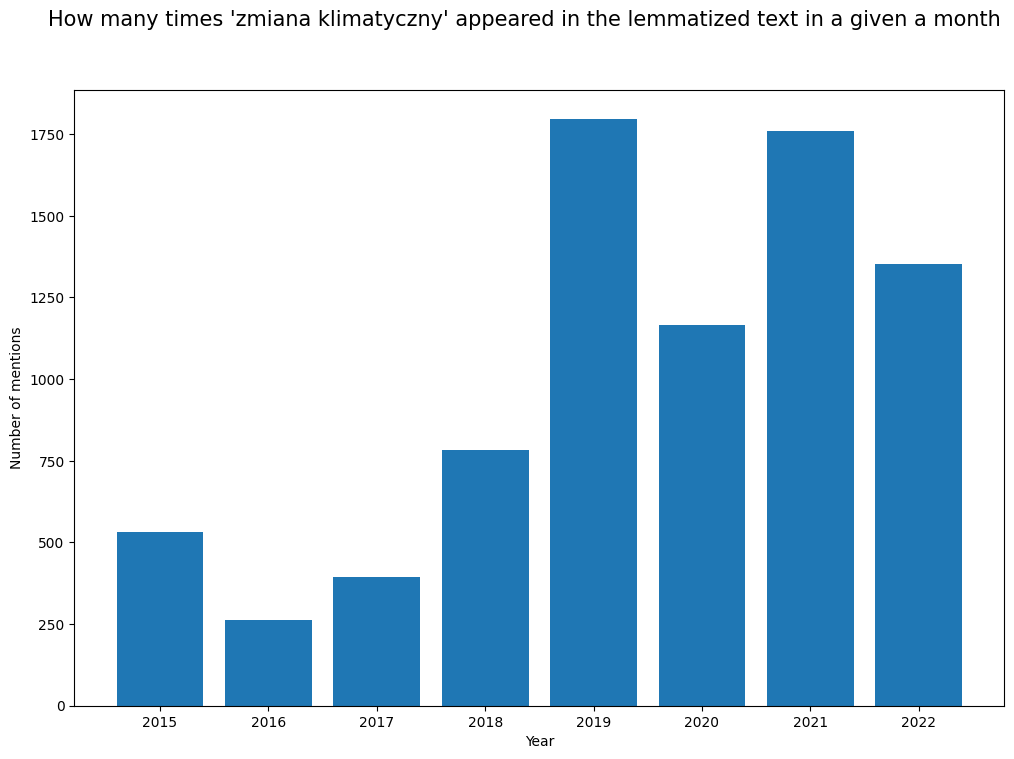

In [34]:
plt.figure(figsize=(12,8))
climate_change_count = data.groupby(data.date.dt.year).climate_change_count.sum()
#climate_change_count = data.groupby(pd.Grouper(key='date', freq='M')).climate_change_count.sum()
plt.bar(climate_change_count.index, climate_change_count)
plt.suptitle("How many times 'zmiana klimat' appeared in the lemmatized text in a given a month", fontsize=15)
plt.ylabel("Number of mentions")
plt.xlabel("Year")
plt.savefig("climate_change.png")